In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from bisect import bisect_right

In [2]:
def get_label(path_to_dataset):
    split = path_to_dataset.split('/')[-1].replace('.csv', '').split('_')
    return split[0], int(split[1])


def get_rows(json_record):
    rows = []
    for i, metric_obj in enumerate(json_record['metrics']):
        row = {}
        row['data'] = json_record['data']
        row['model_id'] = i
        row['label'], row['exp_no'] = get_label(row['data'])
        for key, value in metric_obj.items():
            row[key] = metric_obj[key][0]
        rows.append(row)
    return rows

def parse_log(path):
    json_data = json.load(open(path, 'r'))
    rows = []
    for record in json_data:
        rows.extend(get_rows(record))
    column_names = list(rows[0].keys())
    columns = {x: [y[x] for y in rows] for x in column_names}
    return pd.DataFrame(columns)

In [66]:
languages = {}
used_languages = ['uk', 'id', 'et', 'cs']
val_csv = pd.read_csv('dataset/mswc21/csv/VAL.csv', delimiter=',')
for lang in used_languages:
    languages[lang] = list(val_csv[val_csv['language']==lang]['label'])
print(languages)

{'uk': ['може', 'мене', 'україни', 'дякую', 'добре', 'можна', 'багато', 'було', 'після', 'україни', 'рішення', 'може', 'україні', 'тільки', 'після', 'після', 'люди', 'може', 'рішення', 'україни', 'цього', 'тоді', 'людина', 'мене', 'його', 'будь', 'вони', 'право', 'дякую', 'питання', 'лише', 'багато', 'вона', 'може', 'немає', 'мені', 'була', 'було', 'тому', 'також', 'може', 'тому', 'тільки', 'було', 'тому', 'були', 'було', 'буде', 'україни', 'вони', 'україни', 'зараз', 'просто', 'немає', 'мене', 'була', 'через', 'мені', 'який', 'лише', 'якщо', 'тому', 'тому', 'себе', 'лише', 'буде', 'його', 'бути', 'дякую', 'була', 'дуже', 'дякую', 'через', 'просто', 'людина', 'цього', 'право', 'цього', 'тільки', 'можна', 'бути', 'тому', 'тому', 'просто', 'тому', 'життя', 'його', 'цього', 'просто', 'мені', 'треба', 'можна', 'можна', 'просто', 'його', 'дякую', 'коли', 'може', 'тобто', 'дякую', 'коли', 'тільки', 'цього', 'тому', 'чому', 'багато', 'будь', 'також', 'коли', 'бути', 'вона', 'чому', 'дуже', 'ж

In [3]:
baseline_df = parse_log('./experiments/13_12_2022_cs_uk_id_et_random/log.json')
display(baseline_df)
tuzikov_df = parse_log('./experiments/13_12_2022_cs_uk_id_et_tuzikov4/log.json')
multilingual_128_df = parse_log('./experiments/13_12_2022_cs_uk_id_et_multilingual_128/log.json')
all_1024_df = parse_log('./experiments/13_12_2022_cs_uk_id_et_all_1024/log.json')
fbanks_df = parse_log('./experiments/13_12_2022_cs_uk_id_et_fbanks/log.json')

tuzikov_df = tuzikov_df[tuzikov_df['label'].isin(baseline_df['label'])]
multilingual_128_df = multilingual_128_df[multilingual_128_df['label'].isin(baseline_df['label'])]
all_1024_df = all_1024_df[all_1024_df['label'].isin(baseline_df['label'])]
fbanks_df = fbanks_df[fbanks_df['label'].isin(baseline_df['label'])]


display(tuzikov_df)
display(multilingual_128_df)
display(all_1024_df)
display(fbanks_df)

,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/new_random_cs_uk_id_et/kolla_6.csv,0,kolla,6,0.990504,0.484733,0.0332,0.326478,0.940741
1,experiments/new_random_cs_uk_id_et/biri_2.csv,0,biri,2,0.979044,0.293578,0.0702,0.176211,0.879121
2,experiments/new_random_cs_uk_id_et/андан_4.csv,0,андан,4,0.994340,0.424490,0.0379,0.272966,0.954128
3,experiments/new_random_cs_uk_id_et/добре_4.csv,0,добре,4,0.998267,0.561514,0.0252,0.395556,0.967391
4,experiments/new_random_cs_uk_id_et/дуже_5.csv,0,дуже,5,0.995380,0.647746,0.0284,0.492386,0.946341
...,...,...,...,...,...,...,...,...,...
975,experiments/new_random_cs_uk_id_et/datang_7.csv,0,datang,7,0.987272,0.600000,0.0612,0.506024,0.736842
976,experiments/new_random_cs_uk_id_et/peaks_0.csv,0,peaks,0,0.969827,0.331450,0.0888,0.211031,0.771930
977,experiments/new_random_cs_uk_id_et/göre_0.csv,0,göre,0,0.985480,0.351039,0.0657,0.222222,0.835165
978,experiments/new_random_cs_uk_id_et/jekk_5.csv,0,jekk,5,0.967341,0.400000,0.0852,0.275785,0.727811


,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/kmeans_tuzikov4_cs_uk_id_et/kolla_...,0,kolla,6,0.988298,0.377246,0.0513,0.236398,0.933333
1,experiments/kmeans_tuzikov4_cs_uk_id_et/biri_2...,0,biri,2,0.972523,0.172340,0.0837,0.095406,0.890110
2,experiments/kmeans_tuzikov4_cs_uk_id_et/андан_...,0,андан,4,0.991217,0.671875,0.0593,0.585034,0.788991
3,experiments/kmeans_tuzikov4_cs_uk_id_et/добре_...,0,добре,4,0.998022,0.508571,0.0196,0.344961,0.967391
4,experiments/kmeans_tuzikov4_cs_uk_id_et/дуже_5...,0,дуже,5,0.990431,0.512064,0.0466,0.353050,0.931707
...,...,...,...,...,...,...,...,...,...
975,experiments/kmeans_tuzikov4_cs_uk_id_et/datang...,0,datang,7,0.994624,0.437247,0.0344,0.284211,0.947368
976,experiments/kmeans_tuzikov4_cs_uk_id_et/peaks_...,0,peaks,0,0.950364,0.371308,0.1235,0.357724,0.385965
977,experiments/kmeans_tuzikov4_cs_uk_id_et/göre_0...,0,göre,0,0.982725,0.329060,0.0734,0.204244,0.846154
978,experiments/kmeans_tuzikov4_cs_uk_id_et/jekk_5...,0,jekk,5,0.968863,0.324631,0.0875,0.200843,0.846154


,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,kolla,6,0.988874,0.533040,0.0478,0.379310,0.896296
1,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,biri,2,0.977731,0.298805,0.0814,0.182482,0.824176
2,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,андан,4,0.995471,0.482100,0.0327,0.325806,0.926606
3,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,добре,4,0.994822,0.552901,0.0329,0.402985,0.880435
4,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,дуже,5,0.995633,0.600000,0.0393,0.435165,0.965854
...,...,...,...,...,...,...,...,...,...
975,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,datang,7,0.992327,0.497608,0.0521,0.342105,0.912281
976,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,peaks,0,0.977836,0.349206,0.0770,0.218543,0.868421
977,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,göre,0,0.982589,0.327586,0.0811,0.203753,0.835165
978,experiments/kmeans_multilingual_128_cs_uk_id_e...,0,jekk,5,0.975869,0.415873,0.0840,0.284165,0.775148


,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/kmeans_all_1024_cs_uk_id_et/kolla_...,0,kolla,6,0.991289,0.505976,0.0363,0.346049,0.940741
1,experiments/kmeans_all_1024_cs_uk_id_et/biri_2...,0,biri,2,0.962767,0.328767,0.1062,0.218978,0.659341
2,experiments/kmeans_all_1024_cs_uk_id_et/андан_...,0,андан,4,0.991728,0.494005,0.0367,0.334416,0.944954
3,experiments/kmeans_all_1024_cs_uk_id_et/добре_...,0,добре,4,0.996865,0.618705,0.0318,0.462366,0.934783
4,experiments/kmeans_all_1024_cs_uk_id_et/дуже_5...,0,дуже,5,0.996422,0.490887,0.0240,0.326861,0.985366
...,...,...,...,...,...,...,...,...,...
995,experiments/kmeans_all_1024_cs_uk_id_et/datang...,0,datang,7,0.989948,0.527221,0.0557,0.391489,0.807018
996,experiments/kmeans_all_1024_cs_uk_id_et/peaks_...,0,peaks,0,0.982123,0.306525,0.0769,0.185321,0.885965
997,experiments/kmeans_all_1024_cs_uk_id_et/göre_0...,0,göre,0,0.976536,0.485356,0.0851,0.391892,0.637363
998,experiments/kmeans_all_1024_cs_uk_id_et/jekk_5...,0,jekk,5,0.977711,0.387618,0.0803,0.250871,0.852071


,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/fbanks_cs_uk_id_et/kolla_6.csv,0,kolla,6,0.987796,0.405844,0.0470,0.259875,0.925926
1,experiments/fbanks_cs_uk_id_et/biri_2.csv,0,biri,2,0.976422,0.106971,0.0840,0.056580,0.978022
2,experiments/fbanks_cs_uk_id_et/андан_4.csv,0,андан,4,0.994967,0.513995,0.0376,0.355634,0.926606
3,experiments/fbanks_cs_uk_id_et/добре_4.csv,0,добре,4,0.998181,0.441748,0.0144,0.284375,0.989130
4,experiments/fbanks_cs_uk_id_et/дуже_5.csv,0,дуже,5,0.992631,0.429501,0.0396,0.276151,0.965854
...,...,...,...,...,...,...,...,...,...
975,experiments/fbanks_cs_uk_id_et/datang_7.csv,0,datang,7,0.993806,0.406130,0.0346,0.259804,0.929825
976,experiments/fbanks_cs_uk_id_et/peaks_0.csv,0,peaks,0,0.987179,0.346090,0.0550,0.213552,0.912281
977,experiments/fbanks_cs_uk_id_et/göre_0.csv,0,göre,0,0.979821,0.239067,0.0701,0.137815,0.901099
978,experiments/fbanks_cs_uk_id_et/jekk_5.csv,0,jekk,5,0.976078,0.281818,0.0832,0.166488,0.917160


In [4]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 11}

matplotlib.rc('font', **font)

In [7]:
def get_random_comparison(baseline_df, other_dfs, metrics_name, sort_by_column='data'):
    result = []
    raw = []
    sorted_baseline = baseline_df.sort_values(by=sort_by_column)[metrics_name]
    for df in other_dfs:
        sorted_df = df.sort_values(by=sort_by_column)[metrics_name]
        raw.append(np.array(sorted_df))
        result.append(np.array(sorted_df) / np.array(sorted_baseline))
    return result, np.array(sorted_baseline), raw

comparisons, baseline_values, all_values = get_random_comparison(baseline_df, [tuzikov_df, multilingual_128_df, all_1024_df, fbanks_df], 'binary_f1_score_val')

In [8]:
for comp, values in zip(comparisons, all_values):
    print(np.sum(comp > 1) / len(comp))

0.3163265306122449
0.5316326530612245
0.42448979591836733
0.286734693877551


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


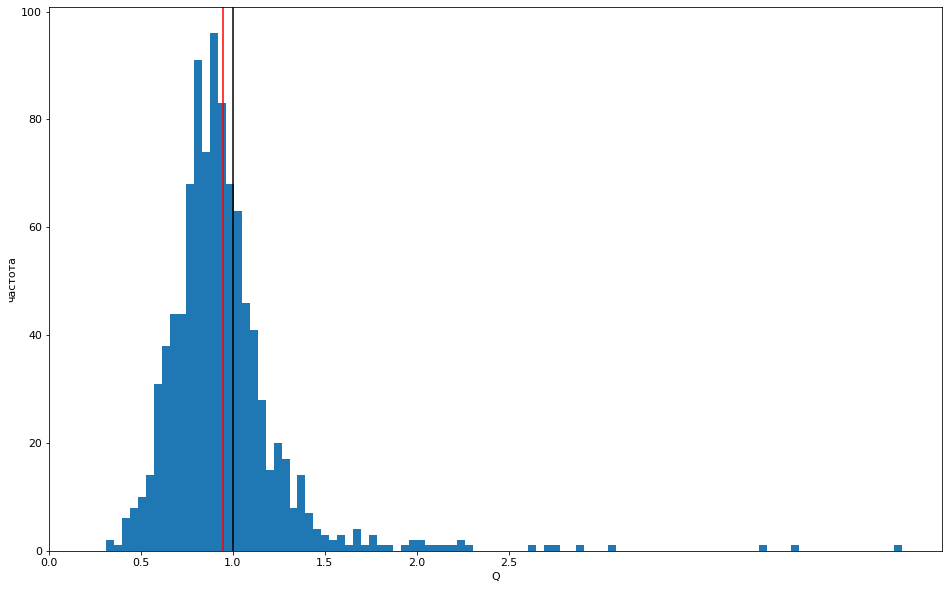

mean:  0.9481144923520781
std:  0.3443511888125051
std feature values: 0.1530575473802257 vs std random baseline: 0.147318415875969


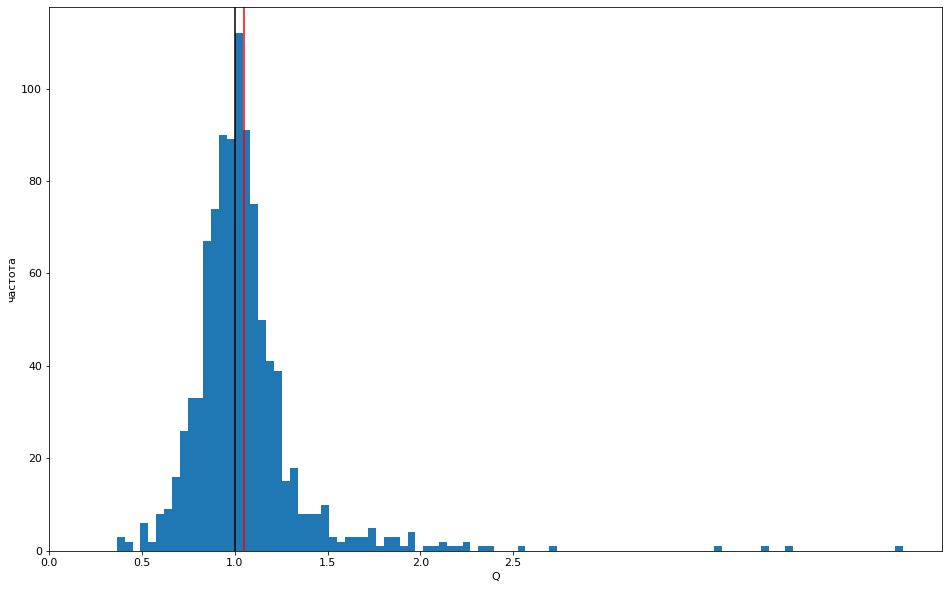

mean:  1.0510232279846432
std:  0.32217139734791467
std feature values: 0.13863106129491018 vs std random baseline: 0.147318415875969


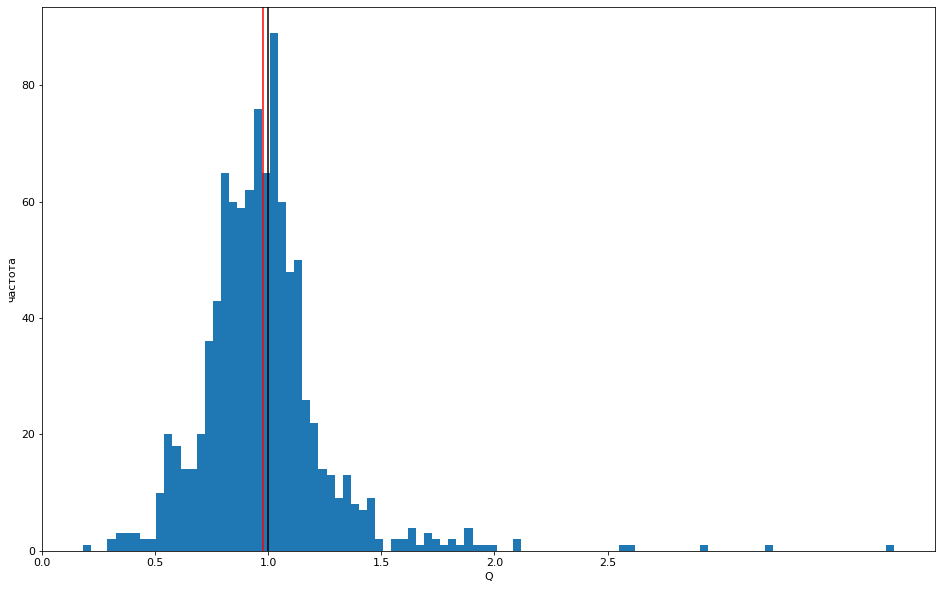

mean:  0.977456939333282
std:  0.28664340786846515
std feature values: 0.15516611391630553 vs std random baseline: 0.147318415875969


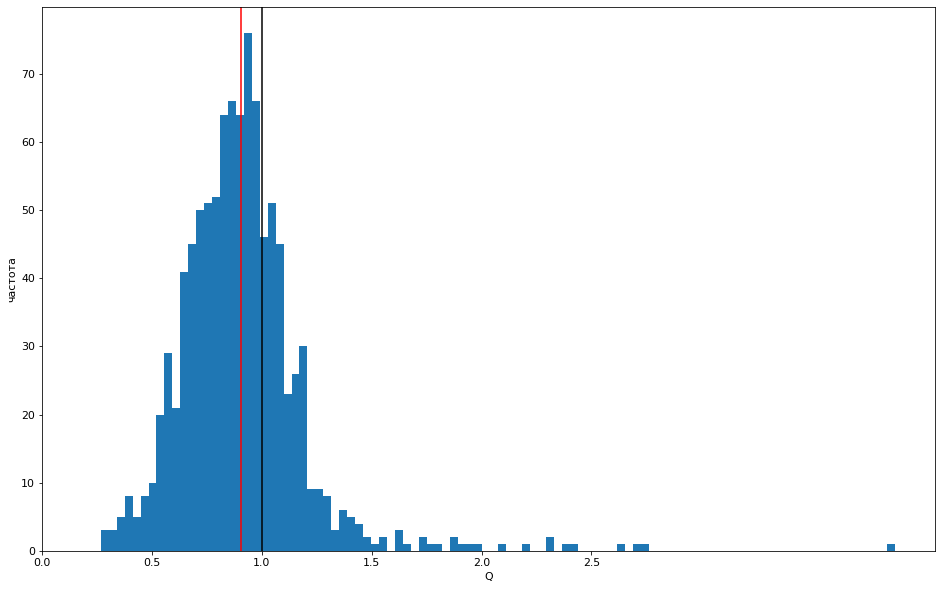

mean:  0.9054121734724727
std:  0.29345730332508746
std feature values: 0.16154280228445847 vs std random baseline: 0.147318415875969


In [9]:
for comp_array, values in zip(comparisons, all_values):
    plt.figure(figsize=(16, 10))
    plt.hist(comp_array, bins=100)
    plt.axvline(1.0, color='black')
    plt.xlabel('Q')
    plt.ylabel('частота')
    plt.xticks(np.arange(0, 3, 0.5))
    plt.axvline(comp_array.mean(), color='red')
    plt.show()
    print('mean: ', comp_array.mean())
    print('std: ', comp_array.std())
    print(f'std feature values: {values.std()} vs std random baseline: {baseline_values.std()}')

In [12]:
baseline_grouped = baseline_df.drop(columns=['exp_no', 'data']).groupby(['label']).mean()
multilingual_128_grouped = multilingual_128_df.drop(columns=['exp_no', 'data']).groupby(['label']).mean()
tuzikov_grouped = tuzikov_df.drop(columns=['exp_no', 'data']).groupby(['label']).mean()
all_1024_grouped = all_1024_df.drop(columns=['exp_no', 'data']).groupby(['label']).mean()
fbanks_grouped = fbanks_df.drop(columns=['exp_no', 'data']).groupby(['label']).mean()

comparisons, baseline_values, all_values = get_random_comparison(baseline_grouped, [tuzikov_grouped, multilingual_128_grouped, all_1024_grouped, fbanks_grouped], 'binary_f1_score_val', 'label')
# print(comparisons)

In [13]:
for comp, values in zip(comparisons, all_values):
    print(np.sum(comp > 1) / len(comp))

0.20408163265306123
0.5
0.3469387755102041
0.15306122448979592


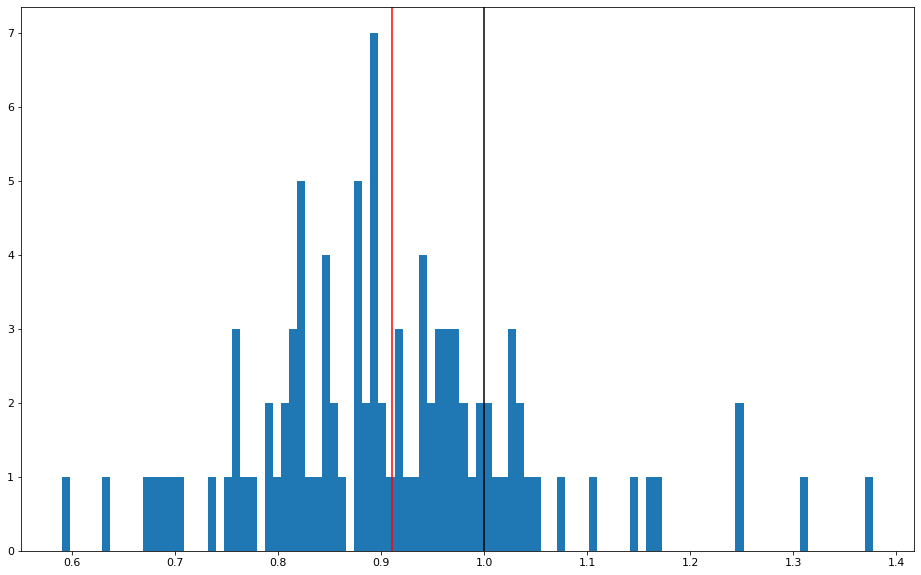

mean:  0.9110442358493381
std:  0.13691039648348485
values: 0.1358825618703592 vs baseline: 0.1221204153256438


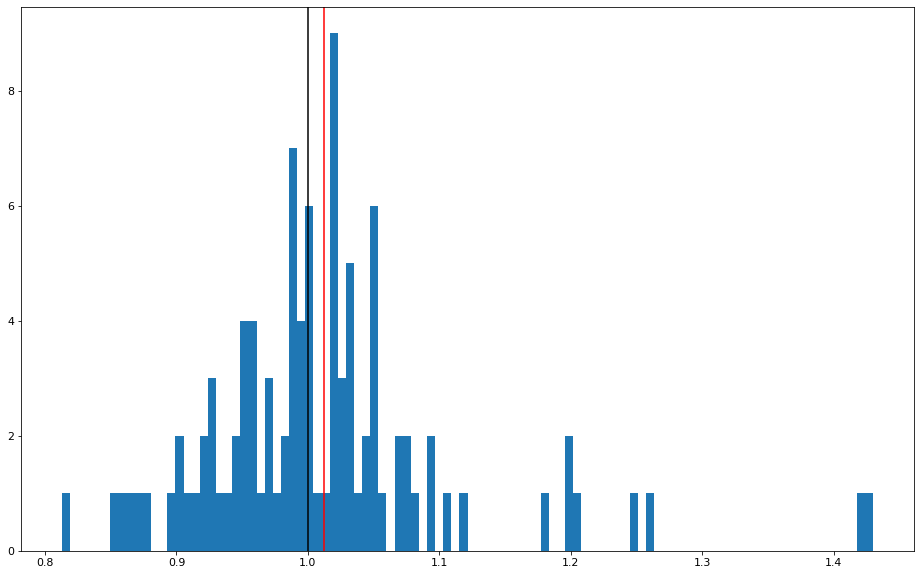

mean:  1.0124450846561157
std:  0.0991824898192788
values: 0.1224790848945691 vs baseline: 0.1221204153256438


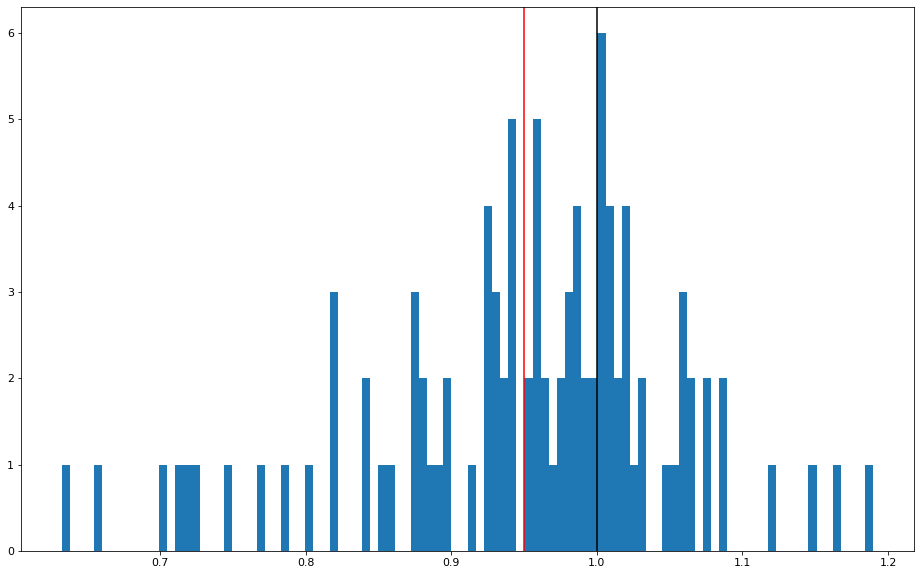

mean:  0.9497018824940887
std:  0.10521318198201826
values: 0.13284650444296847 vs baseline: 0.1221204153256438


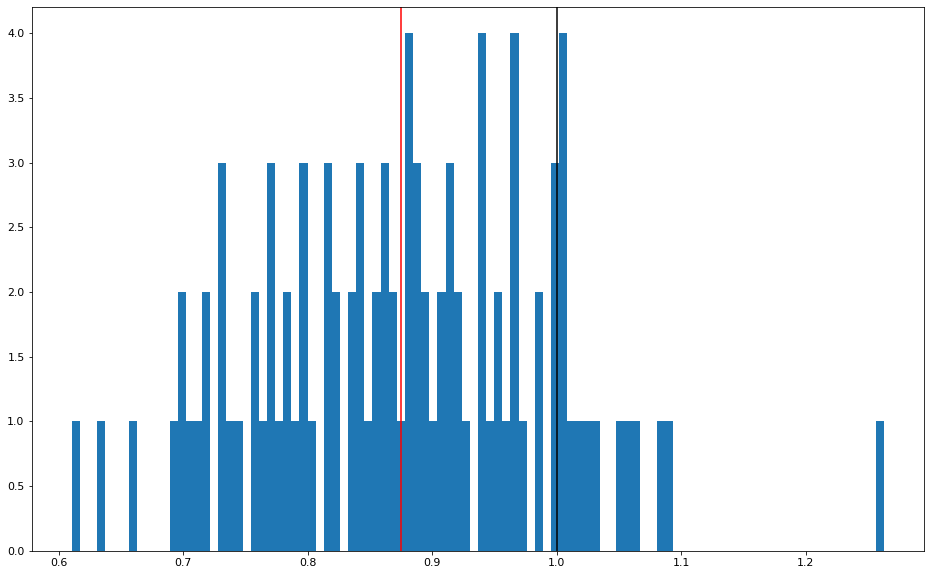

mean:  0.8750358742674551
std:  0.11441087531123963
values: 0.14234228767974685 vs baseline: 0.1221204153256438


In [14]:
for comp_array, values in zip(comparisons, all_values):
    plt.figure(figsize=(16, 10))
    plt.hist(comp_array, bins=100)
    plt.axvline(1.0, color='black')
    plt.axvline(comp_array.mean(), color='red')
    plt.show()
    print('mean: ', comp_array.mean())
    print('std: ', comp_array.std())
    print(f'values: {values.std()} vs baseline: {baseline_values.std()}')

In [68]:
# print(len(baseline_df['label'].unique()))

98


In [69]:
# lang_to_choose = 'uk'
# baseline_df = baseline_df[baseline_df['label'].isin(languages[lang_to_choose])]
# tuzikov_df = tuzikov_df[tuzikov_df['label'].isin(languages[lang_to_choose])]
# multilingual_128_df = multilingual_128_df[multilingual_128_df['label'].isin(languages[lang_to_choose])]
# print(len(baseline_df))

120


In [70]:
# metrics = 'binary_f1_score_val'

# def update_df(df):
#     label_df = df[df['label'] == label]
#     label_min = label_df[metrics].min()
#     label_max = label_df[metrics].max()
#     return df[(df['label'] != label) | ((df[metrics] != label_min) & (df[metrics] != label_max))]
    
# print(len(baseline_df))
# print(len(tuzikov_df))
# print(len(multilingual_128_df))
    
# for label in tqdm(baseline_df['label'].unique()):
#     baseline_df = update_df(baseline_df)
#     tuzikov_df = update_df(tuzikov_df)
#     multilingual_128_df = update_df(multilingual_128_df)     
    
# print(len(baseline_df))
# print(len(tuzikov_df))
# print(len(multilingual_128_df))

In [199]:
def get_means(df):
    dropped = df.drop(columns=['data', 'exp_no'], axis=1)
    return dropped.groupby(by=['model_id', 'label']).mean()

def get_std(df):
    dropped = df.drop(columns=['data', 'exp_no'], axis=1)
    return dropped.groupby(by=['model_id', 'label']).std()

def get_min(df):
    dropped = df.drop(columns=['data', 'exp_no'], axis=1)
    return dropped.groupby(by=['model_id', 'label']).min()

def get_max(df):
    dropped = df.drop(columns=['data', 'exp_no'], axis=1)
    return dropped.groupby(by=['model_id', 'label']).max()

In [200]:
baseline_means = get_means(baseline_df)
tuzikov_means = get_means(tuzikov_df)
multilingual_128_means = get_means(multilingual_128_df)
all_1024_means = get_means(all_1024_df)
# display(baseline_means)
# display(tuzikov_means)
# display(multilingual_128_means)

baseline_std = get_std(baseline_df)
tuzikov_std = get_std(tuzikov_df)
multilingual_128_std = get_std(multilingual_128_df)
all_1024_std = get_std(all_1024_df)
# display(baseline_std)
# display(tuzikov_std)
# display(multilingual_128_std)

baseline_min = get_min(baseline_df)
tuzikov_min = get_min(tuzikov_df)
multilingual_128_min = get_min(multilingual_128_df)
all_1024_min = get_min(all_1024_df)
# display(baseline_std)
# display(tuzikov_std)
# display(multilingual_128_std)

baseline_max = get_max(baseline_df)
tuzikov_max = get_max(tuzikov_df)
multilingual_128_max = get_max(multilingual_128_df)
all_1024_max = get_max(all_1024_df)
# display(baseline_std)
# display(tuzikov_std)
# display(multilingual_128_std)

In [215]:
print(np.sum(baseline_std[metric_name] > tuzikov_std[metric_name]) / len(baseline_std))
print(np.mean(tuzikov_std[metric_name] / baseline_std[metric_name]))
print()
print(np.sum(baseline_std[metric_name] > multilingual_128_std[metric_name]) / len(baseline_std))
print(np.sum(multilingual_128_means[metric_name] > baseline_means[metric_name]) / len(baseline_std))

print(np.mean(multilingual_128_std[metric_name] / baseline_std[metric_name]))

print()
print(np.sum(baseline_std[metric_name] > all_1024_std[metric_name]) / len(baseline_std))
print(np.mean(all_1024_std[metric_name] / baseline_std[metric_name]))

0.6326530612244898
1.0173700273747142

0.7142857142857143
0.5
0.887967059020442

0.5816326530612245
1.09076547978722


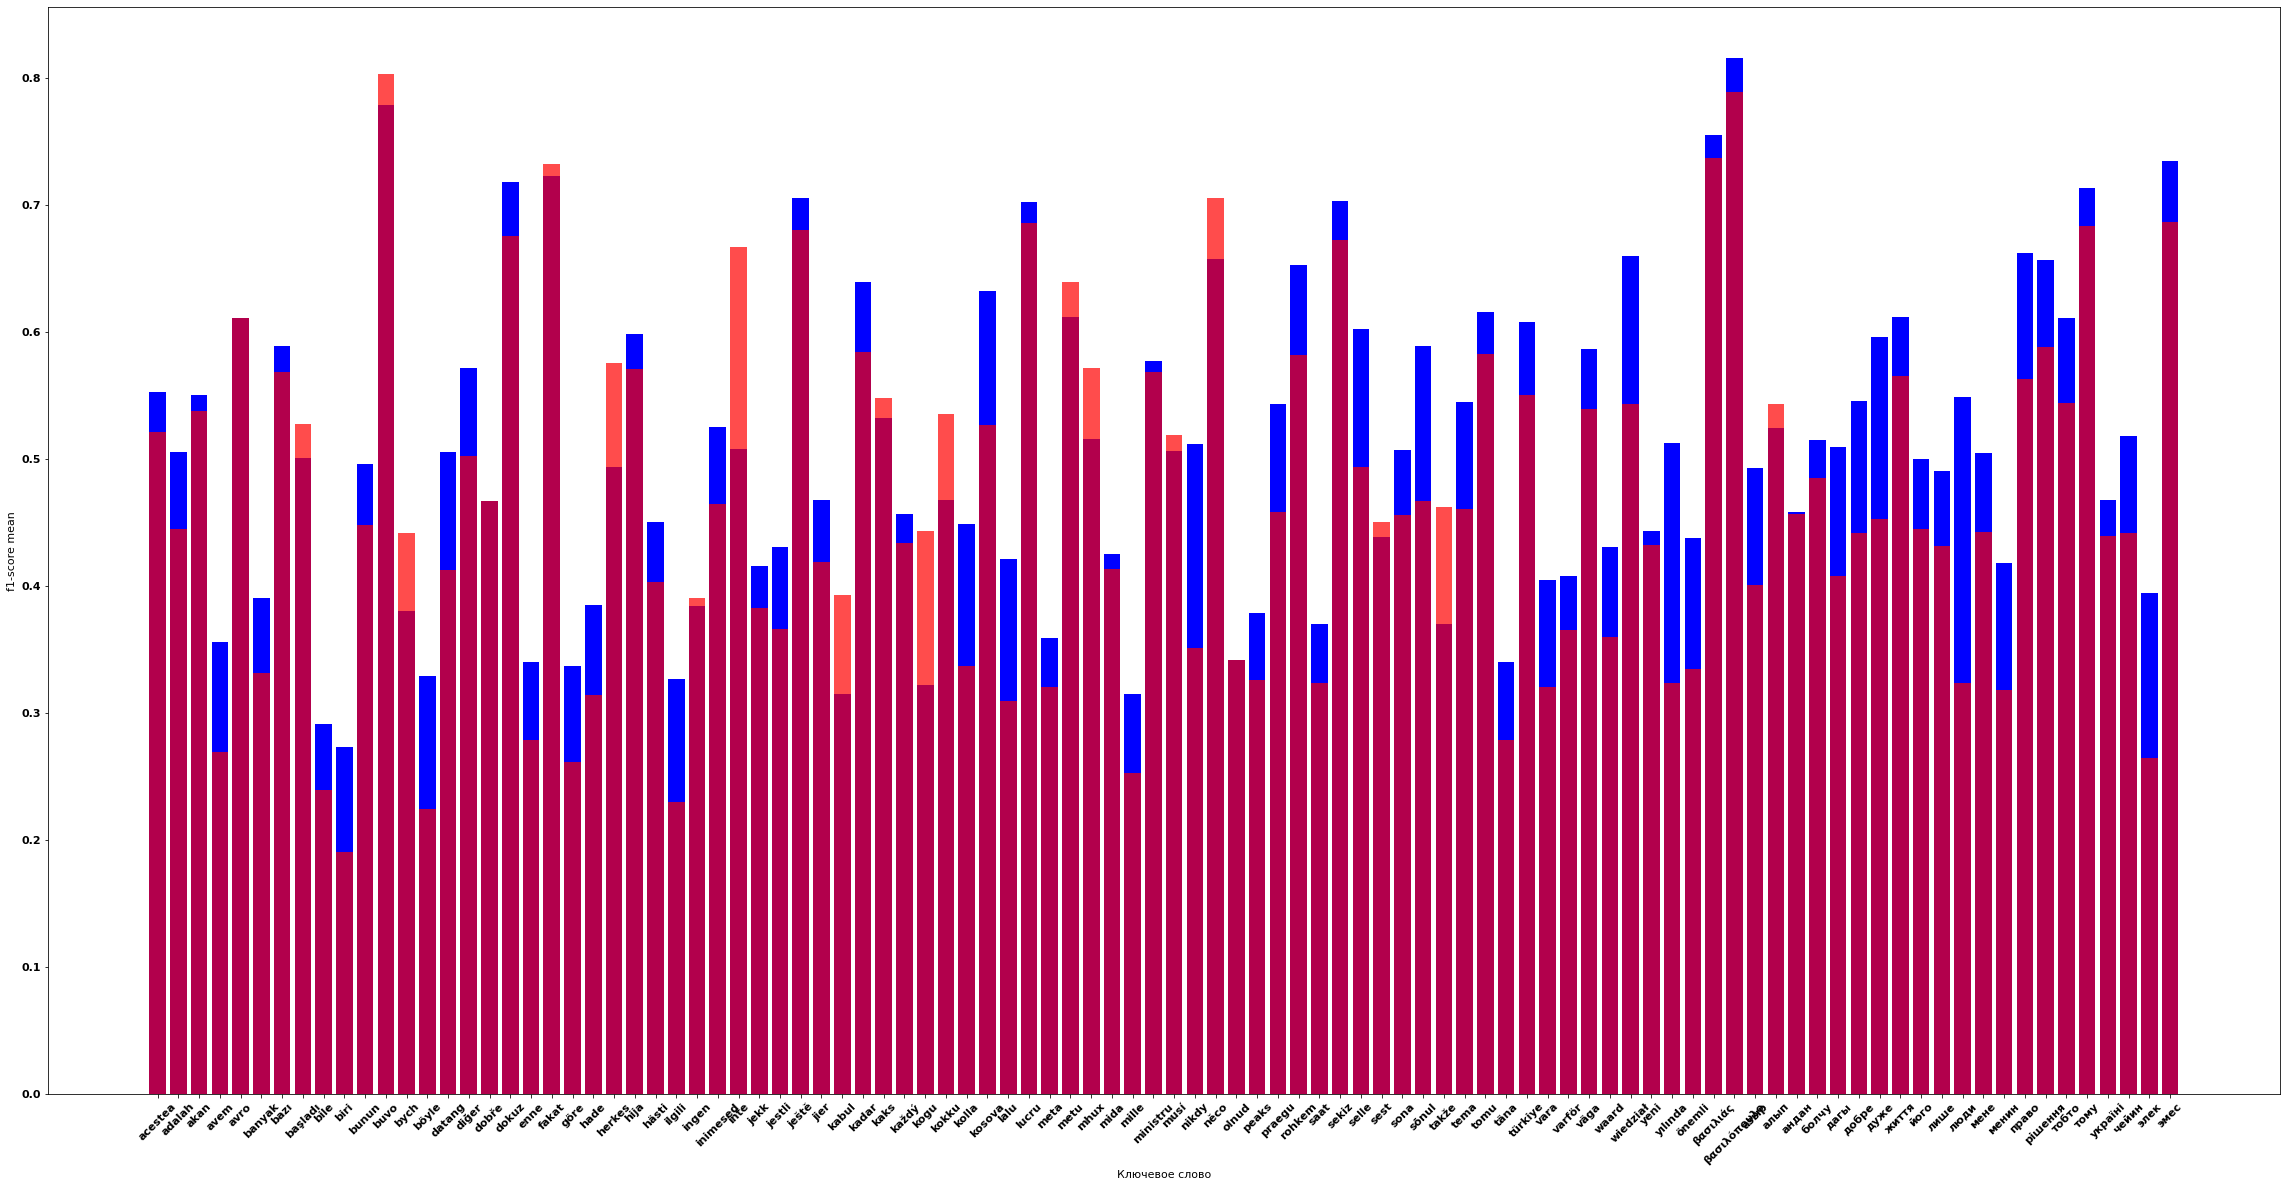

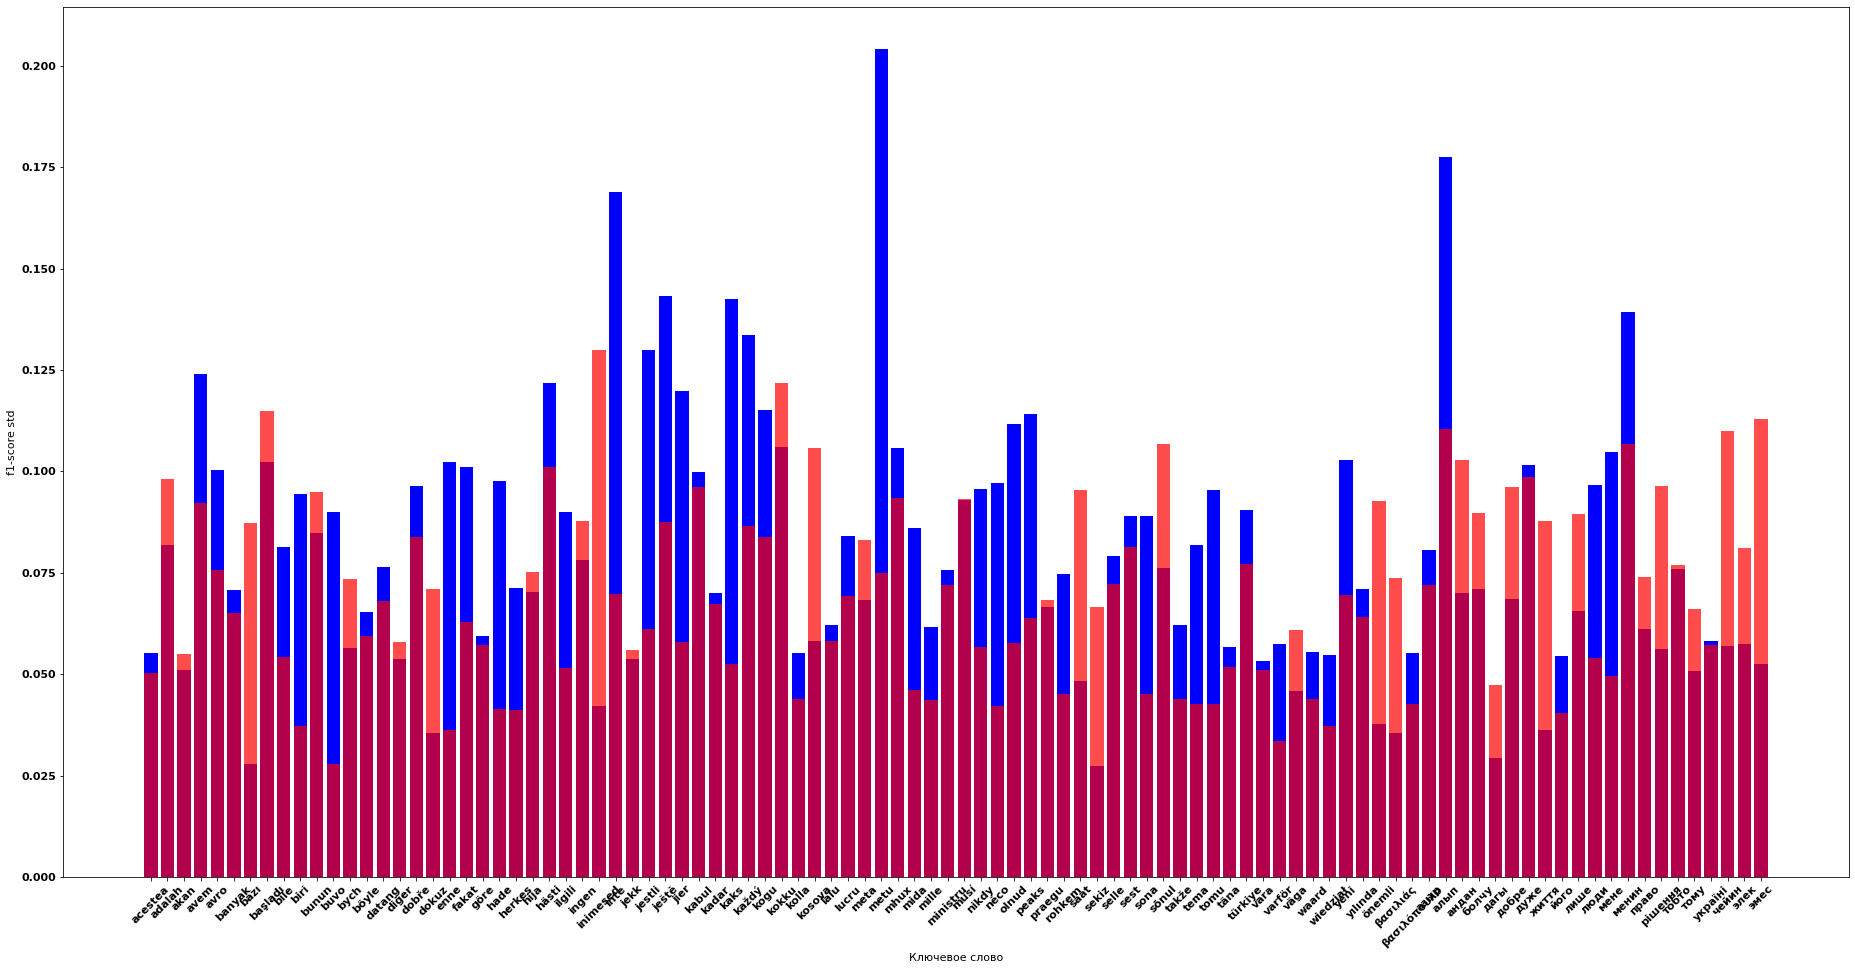

In [207]:
metric_name = 'binary_f1_score_val'

plt.figure(figsize=(40, 20))
plt.xlabel('Ключевое слово')
plt.ylabel('f1-score mean')
plt.bar([x[1] for x in baseline_means.index], baseline_means[metric_name], color='blue')
plt.bar([x[1] for x in tuzikov_means.index], tuzikov_means[metric_name], color='red', alpha = 0.7)
# plt.bar([x[1] for x in multilingual_128_means.index], multilingual_128_means[metric_name], color='green', alpha = 0.7)
# plt.bar([x[1] for x in all_1024_means.index], all_1024_means[metric_name], color='yellow', alpha = 0.7)
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(32, 16))
plt.xlabel('Ключевое слово')
plt.ylabel('f1-score std')
plt.bar([x[1] for x in baseline_std.index], baseline_std[metric_name], color='blue')
plt.bar([x[1] for x in tuzikov_std.index], tuzikov_std[metric_name], color='red', alpha = 0.7)
# plt.bar([x[1] for x in multilingual_128_std.index], multilingual_128_std[metric_name], color='green', alpha = 0.7)
# plt.bar([x[1] for x in all_1024_std.index], all_1024_std[metric_name], color='yellow', alpha = 0.7)
plt.xticks(rotation = 45)
plt.show()

# plt.figure(figsize=(32, 16))
# plt.bar([x[1] for x in baseline_min.index], baseline_min[metric_name], color='blue')
# # plt.bar([x[1] for x in tuzikov_min.index], tuzikov_min[metric_name], color='red', alpha = 0.7)
# plt.bar([x[1] for x in multilingual_128_min.index], multilingual_128_min[metric_name], color='green', alpha = 0.7)
# # plt.bar([x[1] for x in all_1024_min.index], all_1024_min[metric_name], color='yellow', alpha = 0.7)
# plt.xticks(rotation = 45)
# plt.show()

# plt.figure(figsize=(32, 16))
# plt.bar([x[1] for x in baseline_max.index], baseline_max[metric_name], color='blue')
# # plt.bar([x[1] for x in tuzikov_max.index], tuzikov_max[metric_name], color='red', alpha = 0.7)
# plt.bar([x[1] for x in multilingual_128_max.index], multilingual_128_max[metric_name], color='green', alpha = 0.7)
# # plt.bar([x[1] for x in all_1024_max.index], all_1024_max[metric_name], color='yellow', alpha = 0.7)
# plt.xticks(rotation = 45)
# plt.show()

In [218]:
test_0 = pd.read_csv('dataset/mswc21/experiments/kmeans_all_1024_cs_uk_id_et/дуже_1.csv', delimiter=',')
test_1 = pd.read_csv('dataset/mswc21/experiments/kmeans_multilingual_128_cs_uk_id_et/дуже_1.csv', delimiter=',')
test_2 = pd.read_csv('dataset/mswc21/experiments/kmeans_tuzikov4_cs_uk_id_et/дуже_1.csv', delimiter=',')
test_3 = pd.read_csv('dataset/mswc21/experiments/fbanks_cs_uk_id_et/дуже_1.csv', delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/mswc21/experiments/fbanks_cs_uk_id_et/дуже_1.csv'

In [136]:
mode = 'train'
test_0 = test_0[test_0['mode']==mode]
test_1 = test_1[test_1['mode']==mode]
test_2 = test_2[test_2['mode']==mode]
test_3 = test_3[test_3['mode']==mode]

target = '_unknown'
test_0 = test_0[test_0['label']==target]
test_1 = test_1[test_1['label']==target]
test_2 = test_2[test_2['label']==target]
test_3 = test_3[test_3['label']==target]


path_0 = set(test_0['path'])
path_1 = set(test_1['path'])
path_2 = set(test_2['path'])
path_3 = set(test_3['path'])

In [137]:
print(len(path_0))
print(len(path_1))
print(len(path_2))
print(len(path_3))


print('_________')
print(len(path_0.intersection(path_1)))
print(len(path_0.intersection(path_2)))
print(len(path_0.intersection(path_3)))
print('============')

print(len(path_3.intersection(path_0)))
print(len(path_3.intersection(path_1)))
print(len(path_3.intersection(path_2)))
# print(len(path_1.intersection(path_2.intersection(path_3))))
# print(len(path_1.intersection(path_2)))
# print(len(path_2.intersection(path_3)))

200
200
197
200
_________
0
0
0
0
0
0


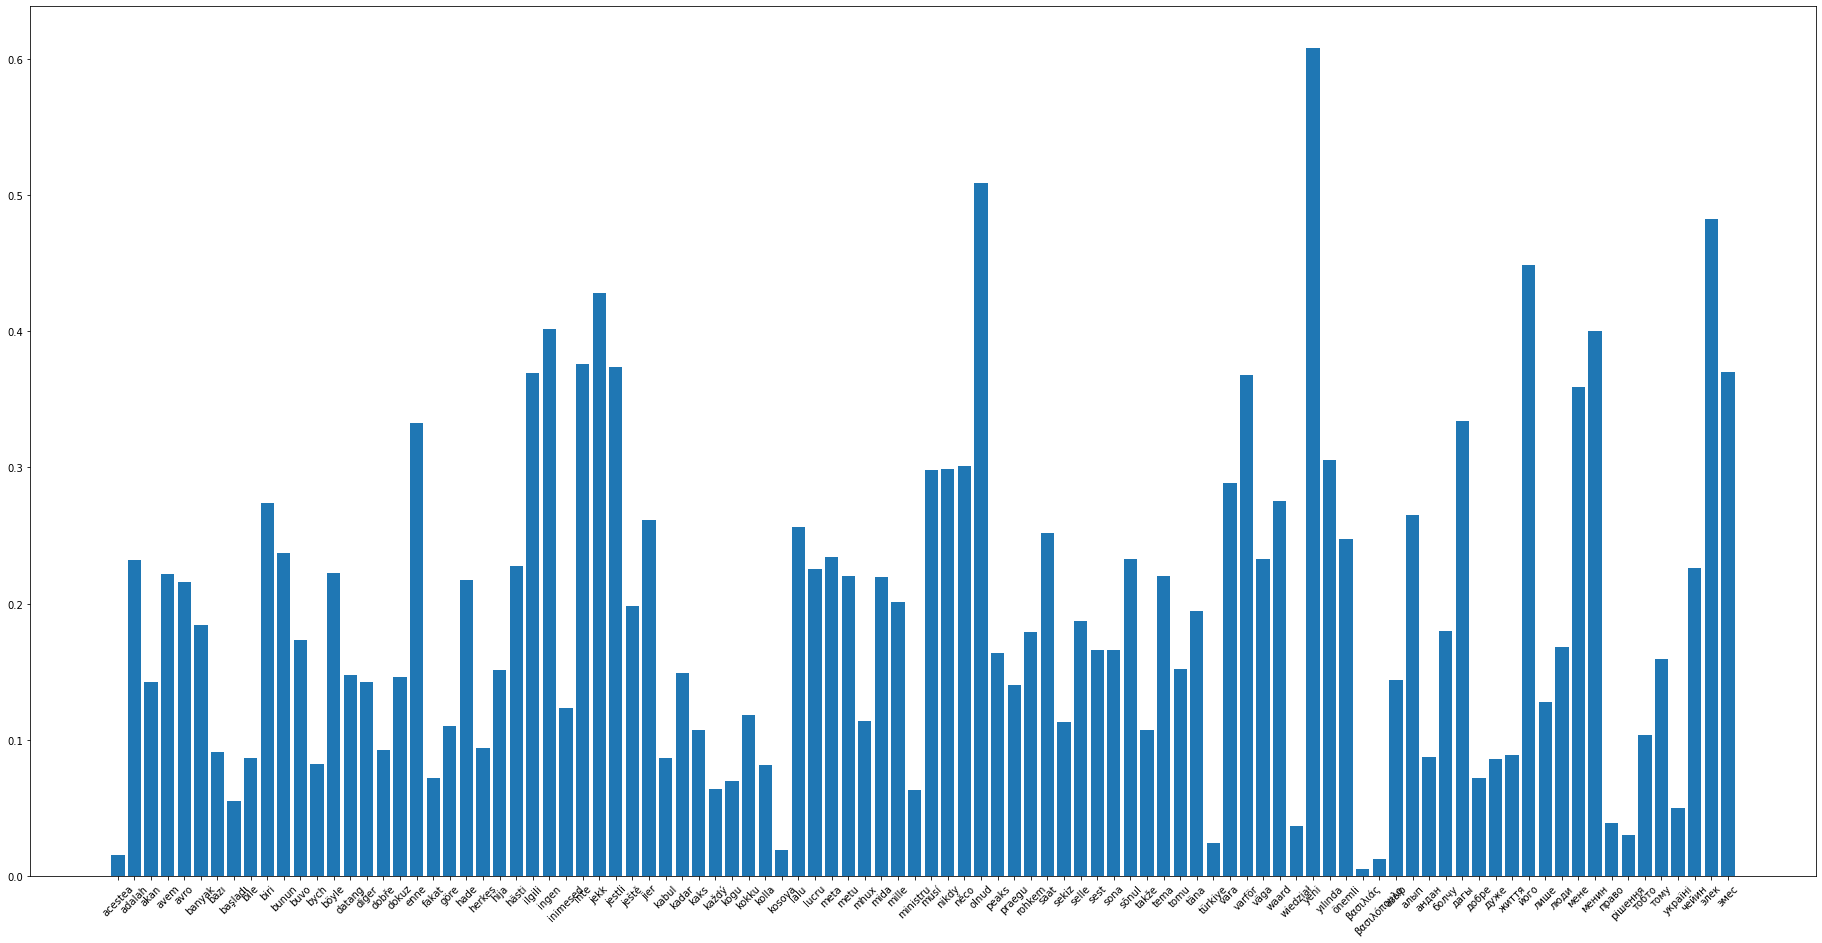

In [23]:
plt.figure(figsize=(32, 16))
plt.bar([x[1] for x in means.index], 1 - means['recall_val'])
plt.xticks(rotation = 45)
plt.show()